In [1]:
import tensorflow
import keras

Using TensorFlow backend.


In [18]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [5]:
my_seed = 42 # 480 could work too
random.seed(my_seed)
np.random.seed(my_seed)
tensorflow.set_random_seed(my_seed)

In [6]:
import IPython

# print system information (but not packages)
print(IPython.sys_info())

# get module information
!pip freeze > frozen-requirements.txt

# append system information to file
with open("frozen-requirements.txt", "a") as file:
    file.write(IPython.sys_info())

{'commit_hash': '8c47bbcb3',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/home/mo/anaconda3/lib/python3.7/site-packages/IPython',
 'ipython_version': '7.5.0',
 'os_name': 'posix',
 'platform': 'Linux-4.15.0-50-generic-x86_64-with-debian-buster-sid',
 'sys_executable': '/home/mo/anaconda3/bin/python',
 'sys_platform': 'linux',
 'sys_version': '3.7.3 (default, Mar 27 2019, 22:11:17) \n[GCC 7.3.0]'}


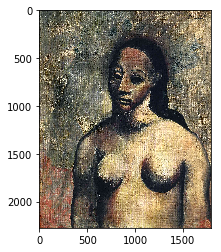

In [14]:
filename = '31554.jpg'
data_dir = '/home/mo/Downloads/painters/'
train_dir = data_dir + 'train_3/'
img = cv2.imread(train_dir + filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [30]:
df = pd.read_csv('all_data_info.csv')

mask = (df['new_filename'].str.startswith('3') & df['in_train'])
train_3_df = df[mask]

# string of just the artist's hash code
img_artist = train_3_df[(train_3_df['new_filename'] == filename)].artist.get_values()[0]

artist_data = train_3_df[(train_3_df['artist'] == img_artist)]
not_artist_data = train_3_df[(train_3_df['artist'] != img_artist)]

num_artist = len(artist_data)
print("Picasso has " + str(num_artist) + " paintings inside train_3")
print("Not-Picasso has " + str(len(not_artist_data)) + " paintings inside train_3")

Picasso has 40 paintings inside train_3
Not-Picasso has 8491 paintings inside train_3


In [31]:
working_train_dir = data_dir + "train/"
working_test_dir = data_dir + "test/"
if (os.path.isdir(working_train_dir) == False):
    os.mkdir(working_train_dir)
    print("created " + working_train_dir)
else:
    print(working_train_dir + " exists")
if (os.path.isdir(working_test_dir) == False):
    os.mkdir(working_test_dir)
    print("created " + working_test_dir)
else:
    print(working_test_dir + " exists")

artist_dir = working_train_dir + 'picasso/'
not_artist_dir = working_train_dir + 'not-picasso/'
if (os.path.isdir(artist_dir) == False):
    os.mkdir(artist_dir)
    print("created " + artist_dir)
else:
    print(artist_dir + " exists")
if (os.path.isdir(not_artist_dir) == False):
    os.mkdir(not_artist_dir)
    print("created " + not_artist_dir)
else:
    print(not_artist_dir + " exists")

# same for test data 
test_artist_dir = working_test_dir + 'picasso/'
test_not_artist_dir = working_test_dir + 'not-picasso/'
if (os.path.isdir(test_artist_dir) == False):
    os.mkdir(test_artist_dir)
    print("created " + test_artist_dir)
else:
    print(test_artist_dir + " exists")
if (os.path.isdir(test_not_artist_dir) == False):
    os.mkdir(test_not_artist_dir)
    print("created " + test_not_artist_dir)
else:
    print(test_not_artist_dir + " exists")

created /home/mo/Downloads/painters/train/
created /home/mo/Downloads/painters/test/
created /home/mo/Downloads/painters/train/picasso/
created /home/mo/Downloads/painters/train/not-picasso/
created /home/mo/Downloads/painters/test/picasso/
created /home/mo/Downloads/painters/test/not-picasso/


In [32]:
from shutil import copy2

num_for_test = 10

i=0
num_artist_in_working_dir = len([name for name in os.listdir(artist_dir)])
for f in artist_data['new_filename']:
    len_dir = len([name for name in os.listdir(artist_dir)]) # to do make this more efficient
    len_test_dir = len([name for name in os.listdir(test_artist_dir)])
    if (len_dir >= num_artist - num_for_test):
        if (len_test_dir >= num_for_test):
            break
        if (os.path.exists(train_dir+f) and not os.path.exists(test_artist_dir+f)):
            copy2(train_dir+f, test_artist_dir)
            i+=1
    elif (os.path.exists(train_dir+f) and not os.path.exists(artist_dir+f)):
        copy2(train_dir+f, artist_dir)
        i+=1
    else:
        None #print(str(i), end=" ")

print("\ncopied artist_data " + str(i))


copied artist_data 40


In [33]:
i=0
num_not_artist_in_working_dir = len([name for name in os.listdir(not_artist_dir)])
for f in not_artist_data['new_filename']:
    len_dir = len([name for name in os.listdir(not_artist_dir)]) # to do make this more efficient
    len_test_dir = len([name for name in os.listdir(test_not_artist_dir)])
    if (len_dir >= num_artist - num_for_test):
        if (len_test_dir >= num_for_test):
            break
        if (os.path.exists(train_dir+f) and not os.path.exists(test_not_artist_dir+f)):
            copy2(train_dir+f, test_not_artist_dir)
            i+=1
    elif (os.path.exists(train_dir+f) and not os.path.exists(not_artist_dir+f)):
        copy2(train_dir+f, not_artist_dir)
        i+=1
    else:
        None #print(str(i), end=" ")

print("\ncopied not_artist_data " + str(i))


copied not_artist_data 40


In [34]:
print(artist_dir+'\t\t', len(os.listdir(artist_dir)))
print(test_artist_dir+'\t\t', len(os.listdir(test_artist_dir)))
print(not_artist_dir+'\t', len(os.listdir(not_artist_dir)))
print(test_not_artist_dir+'\t', len(os.listdir(test_not_artist_dir)))

/home/mo/Downloads/painters/train/picasso/		 30
/home/mo/Downloads/painters/test/picasso/		 10
/home/mo/Downloads/painters/train/not-picasso/	 30
/home/mo/Downloads/painters/test/not-picasso/	 10


In [35]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2 # picasso or not picasso

# https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
weights_notop_path = ''

# declare new Sequential model
# meaning each layer is in sequence, one after the other. 
# apparently there can be non-sequential neural networks... wow!
model = Sequential()

# now let's set up the first layers
model.add(ResNet50(    # add a whole ResNet50 model
  include_top=False,          # without the last layer
  weights='imagenet', # and with the "notop" weights file
  pooling='avg' # means collapse extra "channels" into 1D tensor by taking an avg across channels
))


# Now lets add a "Dense" layer to make predictions
model.add(Dense(
  num_classes, # this last layer just has 2 nodes
  activation='softmax' # apply softmax function to turn values of this layer into probabilities
))

# do not train the first layer
# because it is already smart
# it learned cool patterns from ImageNet
model.layers[0].trainable = False

Instructions for updating:
Colocations handled automatically by placer.
94658560/94653016 [==============================] - 4s 0us/step


In [36]:
model.compile(
  optimizer='sgd', # stochastic gradient descent (how to update Dense connections during training)
  loss='categorical_crossentropy', # aka "log loss" -- the cost function to minimize 
  # so 'optimizer' algorithm will minimize 'loss' function
  metrics=['accuracy'] # ask it to report % of correct predictions
)

In [38]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224

data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator_no_aug = data_generator_no_aug.flow_from_directory(
        working_train_dir,
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

validation_generator = data_generator_no_aug.flow_from_directory(
        working_test_dir,
        target_size=(image_size, image_size),
        class_mode='categorical')

print("\n\nmodel - train_generator_no_aug")

history = model.fit_generator(
        train_generator_no_aug,
        steps_per_epoch=3,
        epochs=8,
        validation_data=validation_generator,
        validation_steps=1)

Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


model - train_generator_no_aug
Epoch 1/8
3/3 [==============================] - 23s 8s/step - loss: 0.7044 - acc: 0.6167 - val_loss: 0.5324 - val_acc: 0.7000
Epoch 2/8
3/3 [==============================] - 18s 6s/step - loss: 0.6381 - acc: 0.6167 - val_loss: 0.8102 - val_acc: 0.6000
Epoch 3/8
3/3 [==============================] - 21s 7s/step - loss: 0.6171 - acc: 0.7000 - val_loss: 0.4867 - val_acc: 0.7000
Epoch 4/8
3/3 [==============================] - 20s 7s/step - loss: 0.4065 - acc: 0.8667 - val_loss: 0.4784 - val_acc: 0.7500
Epoch 5/8
3/3 [==============================] - 19s 6s/step - loss: 0.3058 - acc: 0.8833 - val_loss: 0.4902 - val_acc: 0.8500
Epoch 6/8
3/3 [==============================] - 17s 6s/step - loss: 0.4422 - acc: 0.7667 - val_loss: 0.4832 - val_acc: 0.8000
Epoch 7/8
3/3 [==============================] - 19s 6s/step - loss: 0.2940 - acc: 0.9167 - val_loss: 0.5232 - val_acc: 0.800

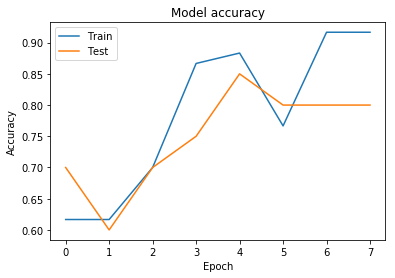

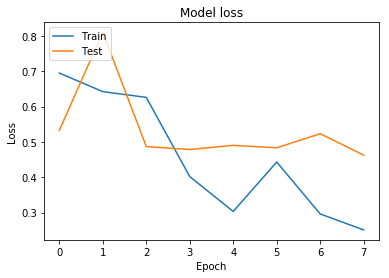

In [39]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [40]:
data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)

train_generator_with_aug = data_generator_with_aug.flow_from_directory(
        working_train_dir,
        target_size=(image_size, image_size),
        batch_size=10,
        class_mode='categorical')

train_generator_small_batch = data_generator_no_aug.flow_from_directory(
        working_train_dir,
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical')

history_aug = model.fit_generator(
        train_generator_with_aug,
        steps_per_epoch=3,
        epochs=8,
        validation_data=validation_generator,
        validation_steps=1)

Found 60 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/8
6/6 [==============================] - 22s 4s/step - loss: 0.6805 - acc: 0.6500 - val_loss: 0.5592 - val_acc: 0.7000
Epoch 2/8
6/6 [==============================] - 17s 3s/step - loss: 0.3957 - acc: 0.8333 - val_loss: 0.5578 - val_acc: 0.8000
Epoch 3/8
6/6 [==============================] - 17s 3s/step - loss: 0.4125 - acc: 0.8000 - val_loss: 0.6456 - val_acc: 0.7000
Epoch 4/8
6/6 [==============================] - 18s 3s/step - loss: 0.2714 - acc: 0.9000 - val_loss: 0.5679 - val_acc: 0.8000
Epoch 5/8
6/6 [==============================] - 18s 3s/step - loss: 0.3260 - acc: 0.8500 - val_loss: 0.5196 - val_acc: 0.8000
Epoch 6/8
6/6 [==============================] - 18s 3s/step - loss: 0.2590 - acc: 0.9167 - val_loss: 0.5126 - val_acc: 0.8000
Epoch 7/8
6/6 [==============================] - 18s 3s/step - loss: 0.3255 - acc: 0.8667 - val_loss: 0.4851 - val_acc: 0.8000
Epoch 8/8
6/6 [================

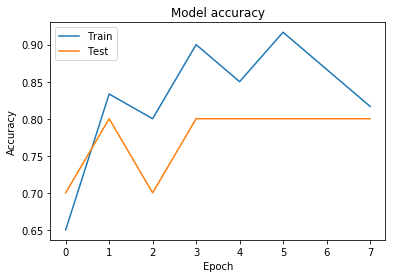

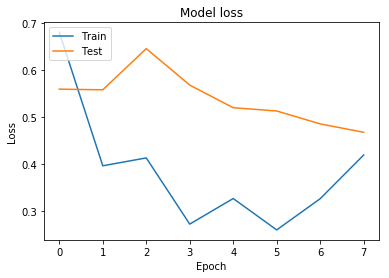

In [41]:
plt.plot(history_aug.history['acc'])
plt.plot(history_aug.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()